In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
users_df = pd.read_csv("C:\\Users\\emre-\\OneDrive\\Masaüstü\\DataScience\\book-analysis\\users.csv", sep=';',encoding="latin-1",on_bad_lines = 'skip',low_memory=False);
ratings_df = pd.read_csv("C:\\Users\\emre-\\OneDrive\\Masaüstü\\DataScience\\book-analysis\\ratings.csv", sep=';',encoding="latin-1",on_bad_lines='skip',low_memory=False);
books_df = pd.read_csv("C:\\Users\\emre-\\OneDrive\\Masaüstü\\DataScience\\book-analysis\\books.csv", sep=';', encoding="latin-1", on_bad_lines='skip', low_memory=False)

In [3]:
#As we are not gonna use the Image URL so we are dropping that at first
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)
books_df.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [4]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
#There are some NA values in users Age, so it is important to take care of that
users_df = users_df.fillna(0)
users_df_drop_1 = users_df.dropna()
users_df = users_df.replace({'%': ''}, regex=True)
users_df.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",0.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",0.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",0.0


In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
print(users_df['Age'].describe())

count    278858.000000
mean         20.948214
std          20.362679
min           0.000000
25%           0.000000
50%          22.000000
75%          35.000000
max         244.000000
Name: Age, dtype: float64


In [9]:
#Since maximum age is 244 and it is arguably not possible, something wrong with it.
def limit_age_digits(age):
    if age > 99:
        return age % 100
    else:
        return age
    
users_df['Age'] = users_df['Age'].apply(limit_age_digits)

print(users_df['Age'].describe())

count    278858.000000
mean         20.804413
std          20.025677
min           0.000000
25%           0.000000
50%          21.000000
75%          35.000000
max          99.000000
Name: Age, dtype: float64


In [10]:
#Creating new dataframe! We will be using ISBN as our common denominator
ratings_books_df = pd.merge(ratings_df, books_df, on='ISBN')
merged_df = pd.merge(ratings_books_df, users_df, on='User-ID')

In [11]:
merged_df.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",0.0
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0


In [12]:
#Summary statistics for location
merged_df.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00,2.695104e+01
std,8.052466e+04,3.854157e+00,1.945181e+01
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00,0.000000e+00
50%,1.412100e+05,0.000000e+00,3.000000e+01
75%,2.114260e+05,7.000000e+00,4.100000e+01
max,2.788540e+05,1.000000e+01,9.900000e+01


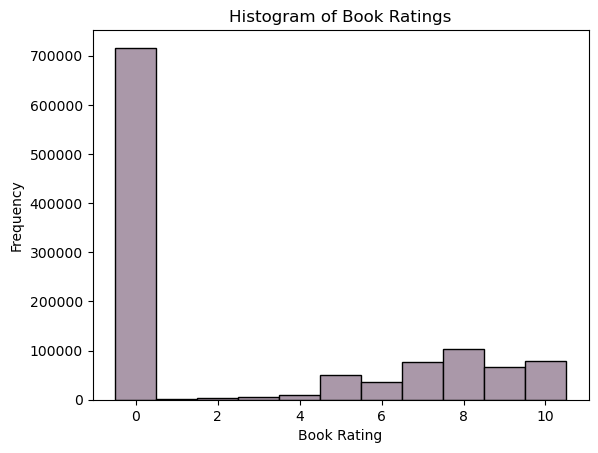

In [13]:
# Extract the ratings variable from the ratings DataFrame
ratings = ratings_df["Book-Rating"]

# Histogram
plt.hist(ratings, bins=11, range=(-0.5, 10.5), edgecolor="black", color="#AA98A9")

# Add labels and title to the plot
plt.xlabel("Book Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Book Ratings")

# Display the plot
plt.show()

In [14]:
users_df['Country'] = users_df['Location'].str.split(',').str[-1].str.strip()

print(users_df.head(10))

   User-ID                            Location   Age         Country
0        1                  nyc, new york, usa   0.0             usa
1        2           stockton, california, usa  18.0             usa
2        3     moscow, yukon territory, russia   0.0          russia
3        4           porto, v.n.gaia, portugal  17.0        portugal
4        5  farnborough, hants, united kingdom   0.0  united kingdom
5        6       santa monica, california, usa  61.0             usa
6        7                 washington, dc, usa   0.0             usa
7        8            timmins, ontario, canada   0.0          canada
8        9          germantown, tennessee, usa   0.0             usa
9       10          albacete, wisconsin, spain  26.0           spain


In [15]:
new_users_df = users_df[["Age", "Country"]]
print(new_users_df)

         Age         Country
0        0.0             usa
1       18.0             usa
2        0.0          russia
3       17.0        portugal
4        0.0  united kingdom
...      ...             ...
278853   0.0             usa
278854  50.0  united kingdom
278855   0.0          canada
278856   0.0             usa
278857   0.0         ireland

[278858 rows x 2 columns]


In [16]:
new_users_df.isnull().sum()

Age        0
Country    0
dtype: int64

In [17]:
new_users_df = new_users_df[new_users_df["Country"] != ""]
new_users_df = new_users_df.sort_values(by=["Country"], ascending=True)
import re

new_users_df = new_users_df[new_users_df["Country"].str.match(r'^[a-zA-Z\s]+$')]

new_users_df.head(10)

,Age,Country
239001,0.0,a
104592,0.0,aaa
141675,0.0,adsgfdr
16359,0.0,afghanistan
98894,42.0,afghanistan
48164,26.0,afghanistan
270717,48.0,afghanistan
14160,25.0,afghanistan
95851,73.0,afghanistan
243047,22.0,afghanistan


In [18]:
new_users_df.to_csv('cleaned_users.csv', index=False)

In [19]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


At this point, cleaning it seemed impossible on kaggle, so i downloaded it, and then used conditional formatting for duplicates on excel, cleaned the database by filtering by conditional format and leaving all white cells (which were the non duplicates and errors), and proceeded to clean as much as i could the states by turning them into countries. Then I went ahead and uploaded it again.

In [20]:
cleaned_df = pd.read_csv(r"C:\Users\emre-\Downloads\cleaned_countries.csv")
cleaned_df.head(2)

,Age,Country
0,0,afghanistan
1,42,afghanistan


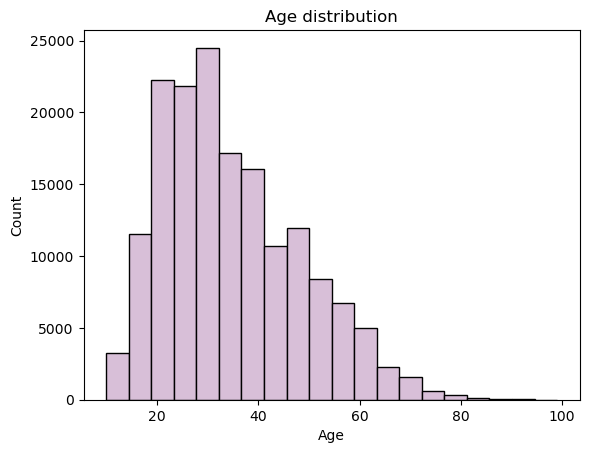

In [21]:
cleaned_df = cleaned_df[cleaned_df['Age'] > 0]

min_age = 10
max_age = 100

cleaned_df = cleaned_df[(cleaned_df['Age'] >= min_age) & (cleaned_df['Age'] <= max_age)]

# Create a histogram
plt.hist(cleaned_df['Age'],  color='#D8BFD8',edgecolor="black", bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

In [22]:
cleaned_df.describe()

,Age
count,164219.000000
mean,34.779118
std,13.608492
min,10.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,99.000000


Great! So we can see both in the histogram and the summary of statistics that our mean demography is 34 year-olds (ish). Based on our preliminary conclusion, we can think of the importance of considering the age of the readers when analyzing book ratings. For the next part, we are gonna concatenate the demography cleaned dataframe and the previously merged dataframe.

In [23]:
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [24]:
cleaned_df.columns

Index(['Age', 'Country'], dtype='object')

In [25]:
merged_df.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00,2.695104e+01
std,8.052466e+04,3.854157e+00,1.945181e+01
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00,0.000000e+00
50%,1.412100e+05,0.000000e+00,3.000000e+01
75%,2.114260e+05,7.000000e+00,4.100000e+01
max,2.788540e+05,1.000000e+01,9.900000e+01


In [26]:
#Drop the "Age" column from cleaned_df
cleaned_df_without_age = cleaned_df.drop(columns=['Age'])

#Concatenate all columns from merged_df and cleaned_df_without_age
new_merged_df = pd.concat([merged_df, cleaned_df_without_age], axis=1)

#Drop rows with any NaN values
new_merged_df = new_merged_df.dropna()

#Display the first 5 rows
new_merged_df.head(5)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Country
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0,afghanistan
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0,afghanistan
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0,afghanistan
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0,afghanistan
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23.0,afghanistan


In [27]:
new_merged_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Location', 'Age', 'Country'],
      dtype='object')

In [28]:
# Convert Year-Of-Publication column to numeric and drop rows with non-numeric values
new_merged_df = new_merged_df[pd.to_numeric(new_merged_df['Year-Of-Publication'], errors='coerce').notnull()]

# Convert Year-Of-Publication column to int
new_merged_df['Year-Of-Publication'] = new_merged_df['Year-Of-Publication'].astype(int)

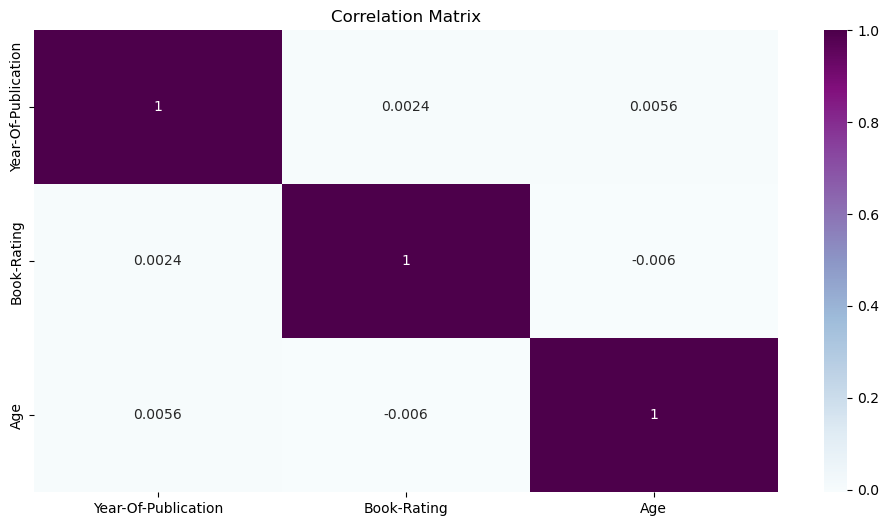

In [29]:
# Create a correlation matrix
corr_matrix = new_merged_df[['Year-Of-Publication', 'Book-Rating','Age']].corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 6))

sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

In [30]:
print(corr_matrix)

                     Year-Of-Publication  Book-Rating       Age
Year-Of-Publication             1.000000     0.002359  0.005614
Book-Rating                     0.002359     1.000000 -0.005957
Age                             0.005614    -0.005957  1.000000


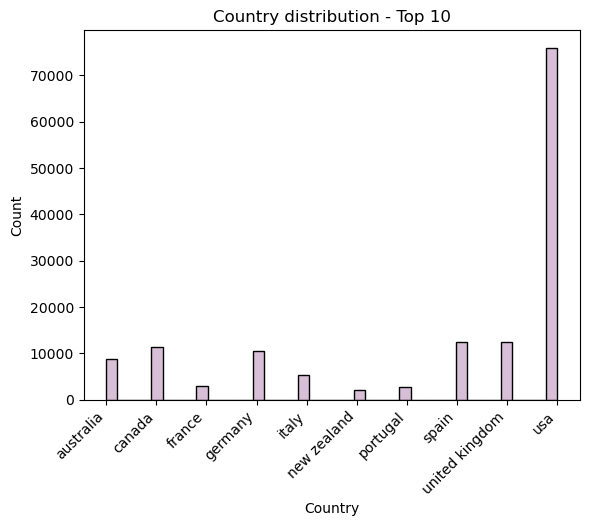

In [31]:
# Create a histogram. But remember, the Country list is massive so we are limiting it to the top 10

# Get the top 10 countries by count
top_countries = new_merged_df['Country'].value_counts().nlargest(10).index.tolist()

# Filter to include only the top 10 countries
new_merge_top_countries = new_merged_df[new_merged_df['Country'].isin(top_countries)]

# Create a histogram
plt.hist(new_merge_top_countries['Country'],  edgecolor="black", color='#D8BFD8', bins=40)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Country distribution - Top 10')
plt.show()

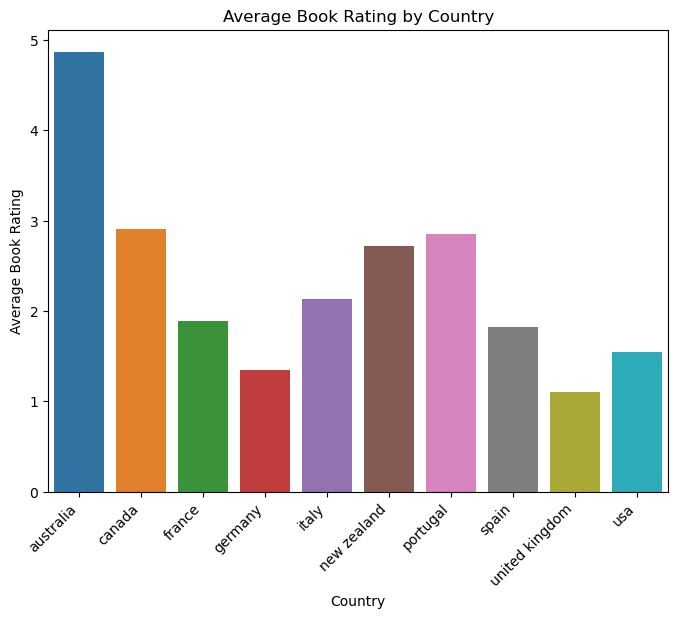

In [32]:
grouped = new_merge_top_countries.groupby('Country')['Book-Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Country', y='Book-Rating', data=grouped)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average Book Rating')
plt.title('Average Book Rating by Country')
plt.show()

As so, we can see there is no big difference between countries from Australia to United Kingdom with average book rating.

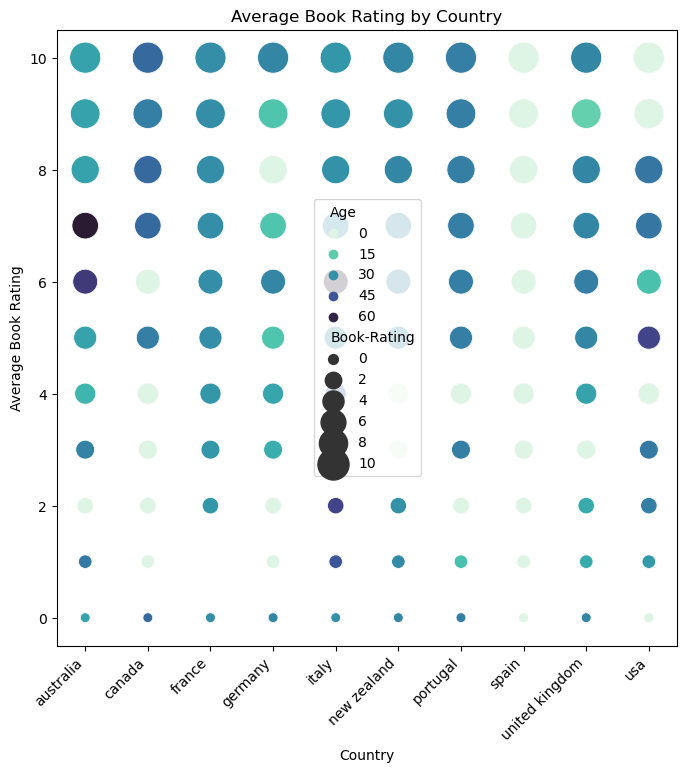

In [33]:
# Filter the data to include only the top 10 countries
top_countries = new_merged_df['Country'].value_counts().nlargest(10).index.tolist()
new_merge_top_countries = new_merged_df[new_merged_df['Country'].isin(top_countries)]

# Group the data by Countries and calculate the mean rating for each book
grouped = new_merge_top_countries.groupby('Country')['Book-Rating'].mean().reset_index()

# Plot!
plt.figure(figsize=(8, 8))

cmap = sns.color_palette("mako_r", as_cmap=True)

sns.scatterplot(data=new_merge_top_countries, x='Country', y='Book-Rating', hue='Age', size='Book-Rating', sizes=(50, 500), palette=cmap)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average Book Rating')
plt.title('Average Book Rating by Country')
plt.show()

I would like to open a parenthesis to zoom in some LatinAmerican Countries and take in the opportunity to also review the patterns found in the countries of Mexic, Colombia, Brazil, Chile and Argentina.

In [34]:
# List of countries to include: (make sure they are written as in the cvs file)
countries = ['Mexico', 'Colombia', 'Brazil', 'Chile', 'Argentina']

# Filter dataframe to include only the 5 LATAM countries
new_merge_top_countries_latam = new_merged_df[new_merged_df['Country'].isin(countries)]

# Group the data by country and calculate the mean book rating to know how these countries tend to rate
grouped = new_merge_top_countries_latam.groupby('Country')['Book-Rating'].mean().reset_index()

# Plot!
plt.figure(figsize=(7, 5))
sns.barplot(x='Country', y='Book-Rating', data=grouped)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average Book Rating')
plt.title('Average Book Rating by Country (Latin America)')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 700x500 with 0 Axes>

So now we know there may be a correlation between Book Ratings and Country, and we know the average reader/reviewer is 34 years. But what about the relationship between age and the year of publication of the books to know if younger generations read recently published books or if perhabs older generations prefer books published longer ago?


In [ ]:
#We are also gonna filter year of publication to the years 1900 to 2010 because otherwise its hard to see

# Filter the data for years between 1950 and 2010
filtered_data = new_merged_df.loc[(new_merged_df['Year-Of-Publication'] >= 1950) & (new_merged_df['Year-Of-Publication'] <= 2010)]

# Create the scatter plot using Seaborn
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Year-Of-Publication', y='Age', data=filtered_data, color='purple')
plt.title('Age vs Year of Publication')
plt.show()

In [ ]:
# Age groups and Age group to DF
age_bins = pd.cut(new_merged_df['Age'], bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
new_merged_df['Age Group'] = age_bins

# Group data to plot by year of publication, age group, and count number of books read
grouped_data = new_merged_df.groupby(['Year-Of-Publication', 'Age Group'])['Book-Rating'].count().reset_index()

# Heatmap
heatmap_data = grouped_data.pivot(index='Age Group', columns='Year-Of-Publication', values='Book-Rating')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Number of Books Read by Age Group and Year of Publication')
plt.show()

The observed pattern indicates that readers, irrespective of their age, predominantly engage with books released between 1970 and 2005. Contrary to the assumption that older individuals might exhibit a stronger interest in books published further back in time, the data reveals a consistent trend of readers favoring materials from the 1970s to the mid-2000s.